# Exercise Set 11: Basic classification models

*Morning, August 20, 2018*

In this Exercise Set you will get your first taste of how machine learning algorithms are constructed. You will implement a [_perceptron_](https://en.wikipedia.org/wiki/Perceptron) from scratch using the matrix-algebra library NumPy. We will train this model on the iris data to predict flower types. 

Many of the concepts both programming-wise and related to machine learning are probably new to most of you - don't be afraid to ask questions about either, as much of this lecture/exercise set lays the foundation for the comming sessions. 


> **Ex. 11.1.1:** The mathematics and biological reasoning which justifies the perceptron model is presented in Raschka, 2017 on pages 18 to 24. If you haven't read it already, quickly do so. 
>
> Begin by importing `numpy`, `pandas` and `seaborn`

In [5]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import seaborn as sns

%matplotlib inline

> **Ex. 11.1.2:** Use the following code snippet to load the iris data. The code will create two new variablex **X** and **y**, each of which are numpy arrays. Split the data as follows. The first dataset should contain the first 70 rows; we call this sample our *training dataset*, or simply *train data*. We use the training data to estimate the data. We use the remaining rows as data for testing our model, thus we call it *test data*. 
>
>```python 
iris = sns.load_dataset('iris')
iris = iris.query("species == 'virginica' | species == 'versicolor'").sample(frac=1, random_state = 3)
X = np.array(iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
y = np.array(iris['species'].map({'virginica': 1, 'versicolor': -1}))
sns.pairplot(iris, hue="species", palette="husl", diag_kws = {'shade': False})
plt.show()
```

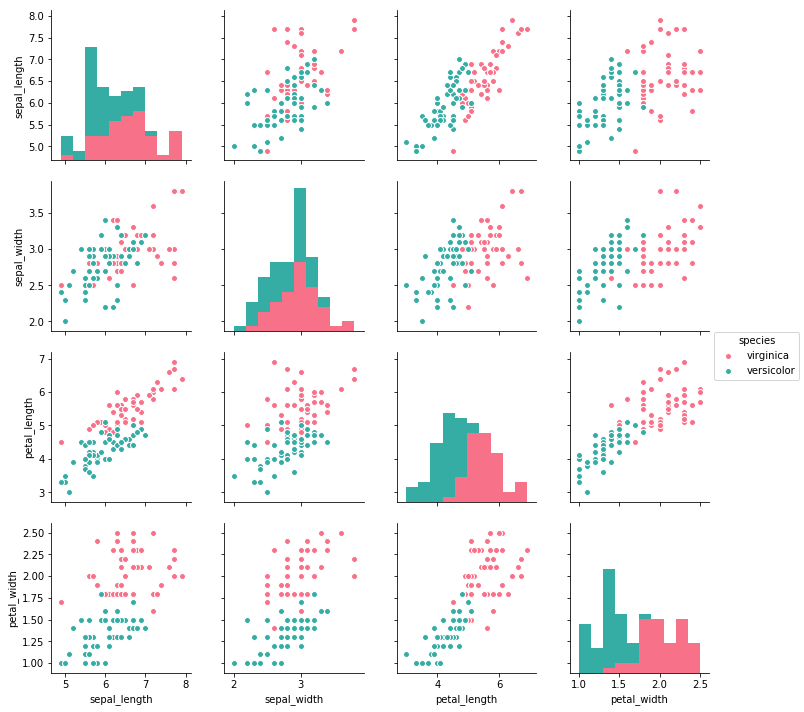

In [58]:
iris = sns.load_dataset('iris')
iris = iris.query("species == 'virginica' | species == 'versicolor'").sample(frac=1, random_state = 3)
X = np.array(iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
y = np.array(iris['species'].map({'virginica': 1, 'versicolor': -1}))
sns.pairplot(iris, hue="species", palette="husl")
plt.show()
# diag_kws = {'shade': False}

X_train = X[:70]
X_test = X[70:]

y_train = y[:70]
y_test = y[70:]

## The perceptron model


> **Ex. 11.1.3:** Write a function which initiate a set of weights `w` with length 1 larger than the number of features in your data. Ensure that your initial weights are not exactly 0, but close to it. 
>
>> _Hint 1:_ Use [np.random.randomState](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.RandomState.html) to set up a random number generator from which you can draw from a normal with mean 0 and scale 0.01. 
>
>> _Hint 2:_ Say you have stored the random number generator in an object called `rgen`. You can then call `rgen.normal(size = 1 + columns_in_X)` to get the weights you want. You might want to tweak the `scale` parameter.

In [273]:
columns_in_X = X.shape[1]
rgen = np.random.RandomState()
w = rgen.normal(loc = 0.0, scale = 0.01, size = columns_in_X + 1)

> **Ex. 11.1.4:** In this problem you need to write two functions:
> * `net_input(X, W)`: calculates _and returns_ the net-input, i.e the linear combination of features and weights, $z=w_0 + \sum_k x_{k} w_{k}$
> * `predict(X, W)`: a step function which returns 1 if the net activation is $\geq$ 0, and returns -1 otherwise. 
>
>*Bonus:* Create a function which calculates the _accuracy_ (the share of cases that are correctly classified). The function should take a vector of y-values and a vector of predicted y-values as input. What is the accuracy of your untrained model on the training data?

>> _Hint 1:_ you can compute the above using an array product. Here numpy's array product named `dot` may be useful

>> _Hint 2:_ remember to include the bias, $w_0$, in the computation!


In [254]:
def net_input(X,W):
    z = w[0] + np.dot(X, W[1:])
    return z

def predict(X,W):
    positive = net_input(X,W)>=0
    y_hat = np.where(positive,1,-1)
    return y_hat

def accuracy(y, X, W):
    accuracy = (y == predict(X,W)).mean()
    return accuracy

> **Ex. 11.1.5:** Write a function whichs loops over the training data (both X and y) using `zip`. For each row in the data, update the weights according to the perceptron rule (remember to update the bias in `w[0]`!). Set $\eta = 0.1$.
>
> Make sure the loop stores the total number of prediction errors encountered underways in the loop by creating an int which is incremented whenever you update the weights. 
>
>> _Hint:_ your function should return the updated weights, as well as the number of errors made by the perceptron.
>
>> _Hint:_ The following code block implements the function in _pseudo_code (it wont run, but serves to communicate the functionality).
>> ```
>> function f(X, y, W, eta):
>>    set errors = 0
>>
>>    for each pair xi, yi in zip(X,y) do:
>>        set update = eta * (yi - predict(xi, W))
>>        set W[1:] = W[1:] + update * xi
>>        set W[0] = W[0] + update
>>        set errors = errors + int(update != 0) 
>>
>>    return W, errors
>> ```
>
> *Bonus:* If you completed the previous bonus assignment, calculate the accuracy on training data using the updated weights. Any progress yet?

In [278]:
def f(X,y,W,eta):
    e = 0
    
    for xi, yi in zip(X,y):
        update = eta * (yi - predict(xi,W))
        W[1:] = W[1:] + update * xi
        W[0] = W[0] + update
        e = e + int(update != 0)
    return W, e

eta = 0.1
f(X_train, y_train, w, eta)

(array([-1.9936997 , -4.68614673, -2.9153766 ,  3.79672455,  4.59160375]), 20)

> **Ex. 11.1.6:** Write a function which repeat the updating procedure you constructed in 11.1.5 for `n_iter` times by packing the whole thing in an outer loop. Make sure you store the number of errors in each iteration in a list. 
>
> Plot the total errors after each iteration in a graph.
>
>> _Hint:_ Make sure you dont reset the weights after each iteration.
>
>> _Hint:_ Once again some pseudocode:
>> ```
>> function g(X, y, n_iter):
>>     set eta = 0.1
>>     set weights = random_weights()
>>     set errorseq = list()
>>
>>     for each _ in range(n_iter):
>>         weights, e = f(X, y, W, eta) 
>>         errorseq.append(e)
>>
>>     return weights, errorseq
>> ```
>
>> _Bonus:_ Wrap the code in a function called Perceptron.

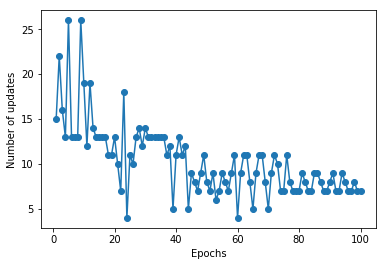

In [292]:
def perceptron(X, y, n_iter):
    eta = 0.1
    columns_in_X = X.shape[1]
    rgen = np.random.RandomState()
    w = rgen.normal(loc = 0.0, scale = 0.01, size = columns_in_X + 1)
    errorseq = list()
    for i in range(n_iter):
        weights, e = f(X, y, w, eta) 
        errorseq.append(e)

    return weights, errorseq
weights, errorseq = perceptron(X_train, y_train, 100)

plt.plot(range(1, len(errorseq) + 1), errorseq, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

> **Ex. 11.1.7 (BONUS):** What is the accuracy of your perceptron on the test data?  

In [ ]:
# [Answer to Ex. 11.1.7 BONUS] 

> **Ex.11.1.8 (BONUS):** Restructure your code as a class called `Perceptron` with `.fit()` and `.predict()` methods (you) will probably need more helper methods. Store hyperparameters as eta and the number of iterations as class attributes.

In [ ]:
# [Answer to Ex. 11.1.8 BONUS] 

## Support Vector Machine 

The support vector machine is another simple but powerful machine-learning algorithm.

> **Ex. 11.2.1:** Go to the [SVC documentation](http://scikit-learn.org/stable/modules/svm.html) - read about the support vector classifier, and answer the following questions: 
> * What kernel seems appropriate for the iris dataset? 
> * What does _scale invariance_ mean? Is the SVC scale invariant? 
> * What is the mathematical intution behind support vector machines? 

In [261]:
from sklearn import svm



> **Ex. 11.2.1:** Import the SVC (_support vector classifier_) from `sklearn.svm`. Create a new object called `clf` like so (you might want to also pass your kernel of choice):
```
clf = SVC(random_state = 1)
```
All scikit learn models have two fundamental methods `.fit()` and `.predict()`. Fit your model to the training data, and store the fitted model in a new object. Import _accuracy_score_ from `sklearn.metrics` and asses the accuracy of the SVC on both your training data and your test data.

In [268]:
from sklearn import svm
from sklearn.metrics import accuracy_score

clf = svm.SVC(random_state = 1)

clf.fit(X_train,y_train)
clf.predict(X_test)

array([-1,  1,  1, -1,  1,  1, -1,  1,  1, -1,  1, -1,  1, -1, -1, -1, -1,
       -1, -1,  1, -1, -1,  1, -1, -1, -1,  1, -1, -1, -1])

## AdaLine (BONUS)
AdaLine is a modified version of the perceptron. The only difference lies in the way the two models learn from their training data, i.e. the optimization method used. The perceptron used the binary classifications for learning, while AdaLine only applies the binary threshold after training, and thus uses real valued numbers when learning. 
>> _Hint:_ Most of the code for this exercise can be written by copying and modifying code from exercise 11.1.

> **Ex. 11.3.1 (BONUS):** Implement two functions described below. You shold reuse your `net_input` from Ex. 11.1.4.:
* `ada_activation_function`: the identify function $ada\_activation(z) = z$
* `ada_predict`: A step function   $ada\_predict(z) = 1 \ if \ z \geq 0  \ else \ 0$ where z is the output of _the activation function_.



> The following figure might help you understand how each of these functions relate to the algorithm, and how the perceptron and adaline differ:
![asd](https://sebastianraschka.com/images/faq/diff-perceptron-adaline-neuralnet/4.png)

In [295]:
# [Answer to Ex. 11.3.1 BONUS]
def net_input(X,W):
    z = w[0] + np.dot(X, W[1:])
    return z

def ada_activation(z):
    return z

def ada_predict(z):
    positive = ada_activation(net_input(X,W))>=0
    y_hat = np.where(positive,1,0)

> **Ex. 11.3.2 (BONUS):** AdaLine uses a _cost function_ to quantize the accuracy of the classifier this is given by 
>$$ 
cost(X,y,W) = \frac{1}{2} \sum_{i=1}^N (y_i - activation(z_i) )^2 , \qquad z_i = net\_input(x_i, W)
$$
> If you've followed any normal undergraduate courses in statistics you should recognize this function. Begin by implementing the cost function. Unlike in undergraduate statistics we will optimize our estimator using gradient descent, therefore **code up the negative of the derivative of the cost function as well**. 
> $$ 
-cost'_j(X,y, W) = -\sum_{i=1}^N (y_i - activation(z_i)) x_i^j,  \qquad z_i = net\_input(x_i, W)
$$
>
>> _Hint:_ Dont compute the sum for each weight $w_j$, instead use numpy's matrix algebra to compute the all of the derivatives at once.
>
>> _Hint:_ The derivative should return a list of the same length as the number of weights, since there is one derivative for each one.

In [2]:
# [Answer to Ex. 11.3.2 BONUS]

> **Ex. 11.3.3 BONUS:** Implement the adaline fitting algorithm using *batch gradient descent*. This is similar to what you did with the perceptron, but while the perceptron did it's optimization after evaluating each row in the dataset, adaline treats the entire dataset as a batch, adjusts it's weights and then does it all again. Thus you only need to loop over `n_iter`, _not_ the data rows. Use the cost function to track the progress of your algorithm.
>
>> _Hint:_ gradient descent will be extremely sensitive to the learning rate $\eta$ in this situation - try setting i to 0.0001 and running the algorithm for 5000 iterations to get some kind of convergence.


In [ ]:
# [Answer to ex. 11.3.3 BONUS]

> **Ex. 11.3.4 (BONUS):** Write a function that scales each of the variables in the dataset (including **y**) using the formula 
$$
x_j^{new} = \frac{x_j^{old} - \mu_j}{\sigma_j}
$$
> rerun the adaline function on the scaled variables.

In [ ]:
# [Answer to Ex. 11.3.4]